n = 10, k = 1
k = 1: lam = 6.633835626702877	res = 0.7178726956274907
k = 2: lam = 8.949940989544265	res = 0.31602004287410296
k = 3: lam = 9.801957274858575	res = 0.029270536113140785
k = 4: lam = 9.81017871406733	res = 2.4117604745384865e-05
k = 5: lam = 9.810178719732983	res = 1.3922752311172196e-14
n = 10, k = 2
k = 1: lam = 8.394505156402108	res = 0.4906824315893024
k = 2: lam = 10.275593591410196	res = 0.12100980698354216
k = 3: lam = 10.4298027512428	res = 0.0018705435529016961
k = 4: lam = 10.429840745748223	res = 7.123679403709533e-09
k = 5: lam = 10.429840745748223	res = 2.1710969534454037e-16
n = 10, k = 3
k = 1: lam = 6.87786733381018	res = 0.6374814819368966
k = 2: lam = 9.013770517089856	res = 0.26537815798163045
k = 3: lam = 9.672077838496966	res = 0.020626110871921666
k = 4: lam = 9.676486584392876	res = 1.0137998203611978e-05
k = 5: lam = 9.676486585485158	res = 1.1967597616770396e-15
n = 10, k = 4
k = 1: lam = 7.098788184767962	res = 0.6221440359595032
k = 2: lam = 9.

/tmp/ipykernel_982812/690644425.py:32: RuntimeWarning: invalid value encountered in divide
  ax[1].plot(err[1:]/(err[:-1]**3))


k = 1: lam = 40.16900965514804	res = 0.6948869978249642
k = 2: lam = 53.33883823369675	res = 0.3444175339794892
k = 3: lam = 59.65200795491976	res = 0.042222525941812195
k = 4: lam = 59.760284761933384	res = 7.811907968253438e-05
k = 5: lam = 59.76028513481208	res = 4.988306522860571e-13
n = 60, k = 75
k = 1: lam = 45.76693936472221	res = 0.568812638996984
k = 2: lam = 58.509040176108066	res = 0.17926762771698285
k = 3: lam = 60.3791883443083	res = 0.005717838471025956
k = 4: lam = 60.38116328054882	res = 1.87327927544802e-07
k = 5: lam = 60.38116328055098	res = 3.9497205851157154e-16
n = 60, k = 76
k = 1: lam = 43.10276946233067	res = 0.638909868818155
k = 2: lam = 56.80638247294056	res = 0.25561840066551905
k = 3: lam = 60.49688896489013	res = 0.01668855777788289
k = 4: lam = 60.513805812221875	res = 4.691303216890682e-06
k = 5: lam = 60.51380581356573	res = 3.0506165561882127e-16
n = 60, k = 77
k = 1: lam = 43.65915289149845	res = 0.603214924674516
k = 2: lam = 56.76905438728424	res

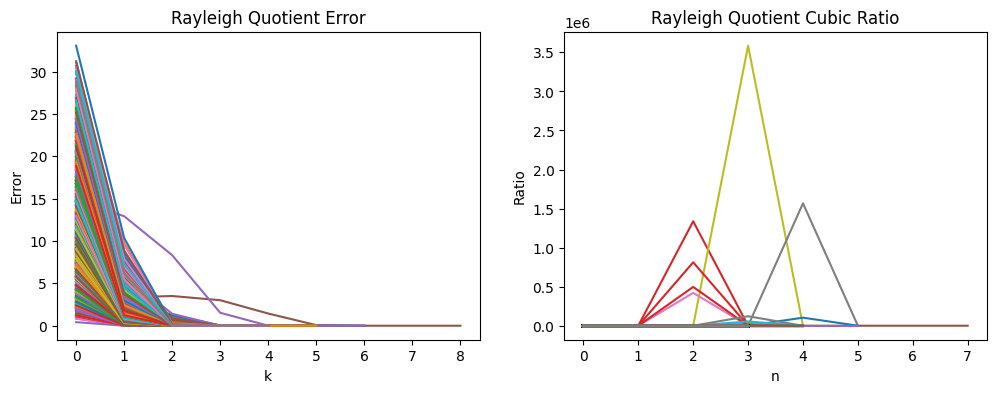

In [38]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 2, figsize=(12, 4))
ax[0].set_title('Rayleigh Quotient Error')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Error')
ax[1].set_title('Rayleigh Quotient Cubic Ratio')
ax[1].set_xlabel('n')
ax[1].set_ylabel('Ratio')
def RayleighQuotient(n = 100):
    
    A = np.random.rand(n, n)
    A = A + A.T
    v = np.random.rand(n)
    v = v / np.linalg.norm(v)
    k = 1
    mu = [np.dot(v.T, np.dot(A, v))]
    tol = 1.0e-12
    I = np.eye(n)
    res = np.abs(np.linalg.norm(np.dot(A, v) - mu[0] * v) / mu[0])
    print(f'k = {k}: lam = {mu[0]}\tres = {res}')
    while res > tol:
        w = np.linalg.solve(A - mu[k-1] * I, v)
        k += 1
        v = w / np.linalg.norm(w)
        mu.append(np.dot(v.T, np.dot(A, v)))
        res = np.abs(np.linalg.norm(np.dot(A, v) - mu[k-1] * v) / mu[k-1])
        print(f'k = {k}: lam = {mu[k-1]}\tres = {res}')
    err = np.abs(mu[-1] - np.array(mu))
    ax[0].plot(err)
    ax[1].plot(err[1:]/(err[:-1]**3))
    
    

for n in range(10, 101, 10):
    for k in range(1, 100):
        print(f'n = {n}, k = {k}')
        try:
            RayleighQuotient(n)
        except:
            print('')
plt.show()
# RayleighQuotient()